# Gender Classification Model Summary
## Overview:
The gender classification model is built using the Logistic Regression algorithm to predict the gender of individuals based on various features. The model is trained on the "gender_classification_v7.csv" dataset, which contains information such as age, height, weight, and shoe size, along with corresponding gender labels.

## Model Performance:
The trained logistic regression model achieved an overall accuracy of 97% on the testing data. This indicates that the model is capable of accurately predicting gender based on the provided features.

## Confusion Matrix:
The confusion matrix provides a detailed summary of the model's predictions. It is visualized as a heatmap to easily identify true positives, true negatives, false positives, and false negatives:


|                | Predicted: Male (0) | Predicted: Female (1) |
|----------------|---------------------|-----------------------|
| **Actual: Male (0)** |       727           |          24           |
| **Actual: Female (1)** |        21           |          729          |

## Classification Report:
The classification report presents precision, recall, F1-score, and support for each class (male and female). It provides a more comprehensive view of the model's performance for both classes.

Classification Report:
| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
|   0   |   0.96    |  0.98  |   0.97   |   751   |
|   1   |   0.98    |  0.96  |   0.97   |   750   |
|-------|-----------|--------|----------|---------|
|  avg/total  |   0.97    |  0.97  |   0.97   |  1501   |



## Predicting New Data Points:
The Gender Classification Model can also predict the gender of new individuals based on their features. To do this, provide the features of the new data points as follows:

```python
# Create a new DataFrame containing the new data points
new_data = pd.DataFrame({
    'age': [25, 30, 22],
    'height': [175, 160, 168],
    'weight': [70, 55, 60],
    'shoe_size': [42, 38, 40],
    'long_hair': [1, 0, 1],
    'forehead_width': [15, 13, 14],
    'forehead_height': [8, 9, 7],
    'nose_width': [3, 4, 3],
    'nose_long': [5, 4, 6],
    'lips_thin': [2, 3, 2],
    'distance_nose_to_lip_long': [5, 4, 5],
    'gender': [-1, -1, -1]  # Placeholder values for predictions, you can remove this column if you want
})

# Make predictions on the new data using the trained model
predictions_new = logistic.predict(new_data.drop(['gender'], axis=1))

# Display the predictions for the new data points
for i in range(len(predictions_new)):
    gender = 'Male' if predictions_new[i] == 0 else 'Female'
    print(f"Data Point {i+1} belongs to: {gender}")
```

By following the provided code, you can easily predict the gender of new individuals based on their features using the Gender Classification Model.

Import Requried Packages

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

Load the dataset from the CSV file using pandas

In [43]:
data=pd.read_csv("https://raw.githubusercontent.com/Timmapuram-Karthik/Gender-Classification-ML/main/gender_classification_v7.csv")

Display the first few rows of the dataset to get an overview

In [44]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


Check the shape of the dataset (number of rows and columns)

In [45]:
data.shape

(5001, 8)

Obtain summary statistics of the dataset (mean, min, max, etc.)

In [46]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


Check for any missing values in the dataset

In [47]:
data.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

Create a copy of the original data to avoid modifying the original dataset

In [48]:
data_copy=data.copy()

Convert the 'gender' column from categorical (text) to numeric using category codes

In [49]:
data_copy['gender']=data_copy['gender'].astype('category')
data_copy['gender']=data_copy['gender'].cat.codes

In [62]:
data_copy.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


Separate the features (x) and the target variable (y) for the model

In [51]:
x=data_copy.drop(['gender'],axis=1)
y=data_copy['gender']

Split the dataset into training and testing sets using 70% for training and 30% for testing

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)

Import the LogisticRegression model from scikit-learn

In [53]:
from sklearn.linear_model import LogisticRegression

Create an instance of the LogisticRegression model

In [54]:
logistic=LogisticRegression()

Train the logistic regression model on the training data

In [55]:
logistic.fit(x_train,y_train)

LogisticRegression()

Calculate the training accuracy and testing accuracy

In [56]:
print("Training Accuracy: {:.2f}%".format(logistic.score(x_train, y_train) * 100))
print("Testing Accuracy: {:.2f}%".format(logistic.score(x_test, y_test) * 100))

Training Accuracy: 97.06%
Testing Accuracy: 96.47%


Make predictions on the testing data using the trained model

In [57]:
predictions = logistic.predict(x_test)

Create the confusion matrix to evaluate the model's performance

In [58]:
from sklearn.metrics import classification_report,confusion_matrix
matrix=confusion_matrix(y_test,predictions)
print(matrix)

[[725  26]
 [ 27 723]]


Visualize the confusion matrix as a heatmap using seaborn

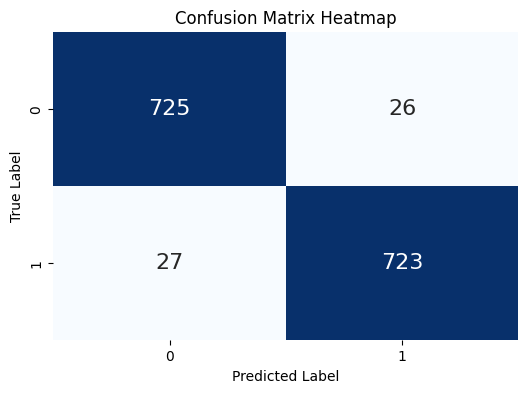

In [59]:
plt.figure(figsize=(6, 4))
sn.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

Calculate and print the classification report, which includes precision, recall, F1-score, and support for each class

In [60]:
report=classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       751
           1       0.97      0.96      0.96       750

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.96      0.96      0.96      1501



# Predict New Data Points

 Create a new DataFrame containing the new data points

In [65]:

new_data = pd.DataFrame({
    'long_hair': [1, 0, 1],
    'forehead_width_cm': [11.8, 14, 14],
    'forehead_height_cm': [6.1, 5.4, 7],
    'nose_wide': [1, 0, 3],
    'nose_long': [0, 0, 6],
    'lips_thin': [1, 1, 2],
    'distance_nose_to_lip_long': [1, 0, 5],
    'gender': [-1, -1, -1] 
})


Make predictions on the new data using the trained model

In [ ]:

predictions_new = logistic.predict(new_data.drop(['gender'], axis=1))

Display the predictions for the new data points

In [66]:
for i in range(len(predictions_new)):
    gender = 'Male' if predictions_new[i] == 1 else 'Female'
    print(f"Data Point {i+1} belongs to: {gender}")

Data Point 1 belongs to: Male
Data Point 2 belongs to: Female
Data Point 3 belongs to: Male



## Conclusion:
The Gender Classification Model is an effective application of machine learning to predict gender based on given features. With high accuracy and detailed evaluation metrics, the model provides valuable insights into gender classification. By predicting new data points, this model becomes a useful tool for gender identification in real-world scenarios. With further enhancements and additional features, the model's capabilities can be expanded, making it a valuable asset in various applications.